In [1]:
!curl -o costs.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/costs.csv
!curl -o supplements.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/supplements.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   125  100   125    0     0    781      0 --:--:-- --:--:-- --:--:--   781
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   358  100   358    0     0   2093      0 --:--:-- --:--:-- --:--:--  2081


In [2]:
import pandas as pd
import numpy as np

# Exercise 1: Panda Series

In [3]:
math = pd.Series([80,96,78,59],['Mark','Barbara','Eleanor','David'])
english = pd.Series([90,87,97,65],['Mark','Barbara','Eleanor','David'])

In [4]:
simple_grades = pd.DataFrame({'Math': math, 'English': english})
print(simple_grades)

         Math  English
Mark       80       90
Barbara    96       87
Eleanor    78       97
David      59       65


In [5]:
data = np.array([[52.0, 73.0], [10.0, 39.0], [35.0, np.nan], [np.nan, 26.0], [np.nan, 99.0], [81.0, 68.0]])
grades = pd.DataFrame(data, columns = ['Math', 'English'], index=['Barbara','David','Eleanor','Greg','Lauren','Mark'])
print(grades.columns)
print(grades.index)
print(grades.values)

Index(['Math', 'English'], dtype='object')
Index(['Barbara', 'David', 'Eleanor', 'Greg', 'Lauren', 'Mark'], dtype='object')
[[52. 73.]
 [10. 39.]
 [35. nan]
 [nan 26.]
 [nan 99.]
 [81. 68.]]


In [6]:
grades.loc[['David','Greg'],'Math']
grades.iloc[[1,3],0]

David    10.0
Greg      NaN
Name: Math, dtype: float64

# Exercise 2: .loc operator

In [7]:
print(grades.loc[['Eleanor','Mark'],['English','Math']])

         English  Math
Eleanor      NaN  35.0
Mark        68.0  81.0


# Exercise 3: Girlfriend vs. Fortnite

In [8]:
with open('./costs.csv') as f:
  costs = pd.read_csv(f)

In [9]:
costs['girlfriend'] = 500
costs = costs.reindex(columns=['rent','books','food','fortnite_skins','girlfriend'])
costs = costs.sort_values('fortnite_skins',ascending=False)
costs['rent'] = 1000
costs.head(6)

,rent,books,food,fortnite_skins,girlfriend
2,1000,300,775,40,500
3,1000,312,750,18,500
4,1000,330,712,16,500
0,1000,385,800,15,500
1,1000,280,700,10,500
5,1000,120,900,5,500


# Exercise 4: Not a Number

In [10]:
costs.append(costs.mean(),ignore_index=True)

,rent,books,food,fortnite_skins,girlfriend
0,1000.0,300.000000,775.000000,40.000000,500.0
1,1000.0,312.000000,750.000000,18.000000,500.0
2,1000.0,330.000000,712.000000,16.000000,500.0
3,1000.0,385.000000,800.000000,15.000000,500.0
4,1000.0,280.000000,700.000000,10.000000,500.0
5,1000.0,120.000000,900.000000,5.000000,500.0
6,1000.0,287.833333,772.833333,17.333333,500.0


# Exercise 5: Supplements

In [11]:
with open ('./supplements.csv') as f:
  supplements = pd.read_csv(f)

In [12]:
supplements = supplements.fillna(method='bfill')
supplements = supplements.sort_values('vitamin_b6',ascending=False)
subset_df = supplements.drop(columns=['vitamin_d'])

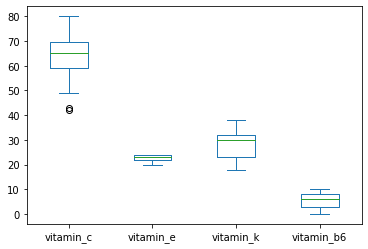

In [13]:
import matplotlib.pyplot as plt
subset_df.plot.box()
plt.show()

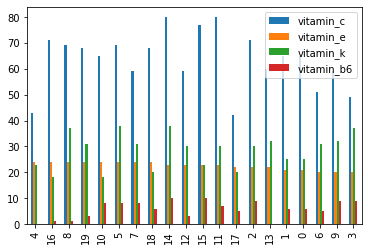

In [23]:
subset_df.sort_values('vitamin_e', ascending=False).plot.bar() # no.14 vit C, no. 4 vit_e (though all pretty much the same), no. 5 no. 14, no 15 no 14
plt.show()

# Exercise 6: Lab Write-Up

After plotting the data as a histogram, I can see that there isn't much consistancy between the amounts of each vitamin in each supplement (i.e., supplements with more vitamin_c don't necessarily have more vitamin_k). However, supplement #14 did seem to be the "biggest" supplements, ranking the most in most of the vitamin (1st in vitamin_c and 2nd most for vitamin_k and vitamin_b6). The two low outliers you can see in the boxplot for vitamin_c are supplements #4 and #17.